## This notebook is for LRG specific results from SV3 LSS catalogs

In [2]:
import numpy as np
import fitsio
from matplotlib import pyplot as plt
import os
from scipy.special import erf

In [3]:
ff = fitsio.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/LSScats/test/LRGAlltiles_full.dat.fits')

total number of unique reachable LRG targets is 103823
total number of unique observed LRG targets is 99059
total number of unique LRG targets with good redshifts is 97480
targeting completeness is 0.9541142136135539
redshift success rate is 0.9840600046436971


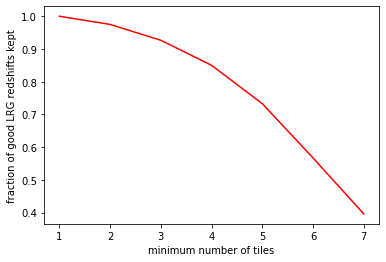

In [4]:
print('total number of unique reachable LRG targets is '+str(len(ff)))
wo = ff['LOCATION_ASSIGNED'] == 1
print('total number of unique observed LRG targets is '+str(len(ff[wo])))
wz = ff['ZWARN'] == 0
print('total number of unique LRG targets with good redshifts is '+str(len(ff[wz])))
print('targeting completeness is '+str(len(ff[wo])/len(ff)))
print('redshift success rate is '+str(len(ff[wz])/len(ff[wo])))
ngl = [len(ff[wz])]
ntm = [1]
for nt in range(1,7):
    wt = ff['NTILE'] > nt
    ntm.append(nt+1)
    ngl.append(len(ff[wz&wt]))
plt.plot(ntm,np.array(ngl)/len(ff[wz]),'r-')
plt.xlabel('minimum number of tiles')
plt.ylabel('fraction of good LRG redshifts kept')
plt.show()


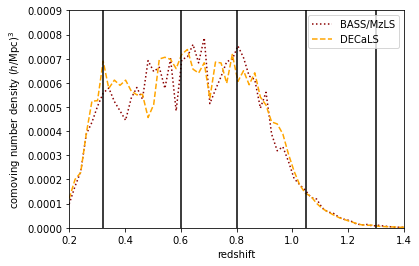

In [30]:
#plot n(z)
nz = np.loadtxt('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/LSScats/v0/LRG_N_nz.dat').transpose()
plt.plot(nz[0],nz[3],':',color='darkred',label='BASS/MzLS')
nz = np.loadtxt('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/LSScats/v0/LRG_S_nz.dat').transpose()
plt.plot(nz[0],nz[3],'--',color='orange',label='DECaLS')
plt.legend()
plt.xlim(0.2,1.4)
plt.ylim(0,0.0009)
xl = [0.32,0.32]
yl = [0,0.001]
plt.plot(xl,yl,'k-')
xl = [0.6,0.6]
yl = [0,0.001]
plt.plot(xl,yl,'k-')
xl = [0.8,0.8]
yl = [0,0.001]
plt.plot(xl,yl,'k-')
xl = [1.05,1.05]
yl = [0,0.001]
plt.plot(xl,yl,'k-')
xl = [1.3,1.3]
yl = [0,0.001]
plt.plot(xl,yl,'k-')
xl = [1.6,1.6]
yl = [0,0.001]
plt.plot(xl,yl,'k-')
plt.xlabel('redshift')
plt.ylabel(r'comoving number density ($h$/Mpc)$^3$')
plt.show()

In [34]:
wz = nz[0] > 0.32
wz &= nz[0] < 0.6
n = sum(nz[-2][wz])/sum(nz[-1][wz])
print(n)

0.000609514309512854


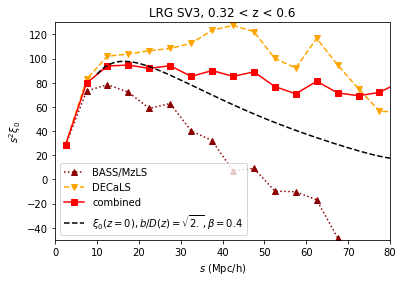

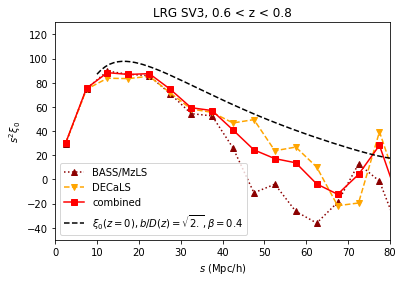

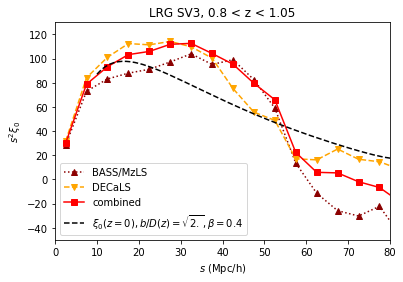

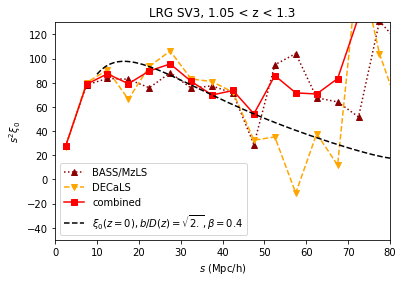

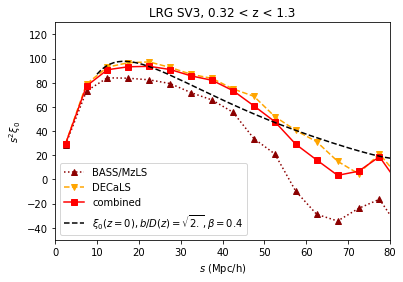

In [30]:
zl = [0.32,0.6,0.8,1.05,1.3]
for i in range(0,len(zl)):
    if i == len(zl)-1:
        zmin=zl[0]
        zmax=zl[-1]
    else:
        zmin = zl[i]
        zmax = zl[i+1]

    xils = np.loadtxt('/global/cscratch1/sd/ajross/SV3xi/xi024SV3_testLRG_S'+str(zmin)+str(zmax)+'5st0.dat').transpose()
    xil = np.loadtxt('/global/cscratch1/sd/ajross/SV3xi/xi024SV3_testLRG'+str(zmin)+str(zmax)+'5st0.dat').transpose()
    xiln = np.loadtxt('/global/cscratch1/sd/ajross/SV3xi/xi024SV3_testLRG_N'+str(zmin)+str(zmax)+'5st0.dat').transpose()
    plt.plot(xil[0],xil[0]**2.*xiln[1],'^:',color='darkred',label='BASS/MzLS')
    plt.plot(xil[0],xil[0]**2.*xils[1],'v--',color='orange',label='DECaLS')
    plt.plot(xil[0],xil[0]**2.*xil[1],'s-r',label='combined')
    xilin = np.loadtxt(os.environ['HOME']+'/BAOtemplates/xi0Challenge_matterpower0.44.04.08.015.00.dat').transpose()
    #plt.plot(xilin[0],xilin[0]**2.*xilin[1]*2.2,'k-.',label=r'$\xi_{\rm 0}(z=0),b/D(z)=\sqrt{2.2},\beta=0.4$')
    #xilin = np.loadtxt(os.environ['HOME']+'/BAOtemplates/xi0Challenge_matterpower0.44.04.08.015.00.dat').transpose()
    plt.plot(xilin[0],xilin[0]**2.*xilin[1]*2.,'k--',label=r'$\xi_{\rm 0}(z=0),b/D(z)=\sqrt{2.},\beta=0.4$')
    #xilin = np.loadtxt(os.environ['HOME']+'/BAOtemplates/xi0Challenge_matterpower0.44.04.08.015.00.dat').transpose()
    #plt.plot(xilin[0],xilin[0]**2.*xilin[1]*1.8,'k:',label=r'$\xi_{\rm 0}(z=0),b/D(z)=\sqrt{1.8},\beta=0.4$')

    plt.title('LRG SV3, '+str(zmin)+' < z < '+str(zmax))
    plt.xlim(0,80)
    plt.ylim(-50,130)
    plt.xlabel(r'$s$ (Mpc/h)')
    plt.ylabel(r'$s^2\xi_0$')
    plt.legend()
    plt.show()

## clustering looks kind of funky...not sure what is going on

105365
99059
[   0    4   32   36 1024 1056 1060 1570]
99059
97499
96763
0


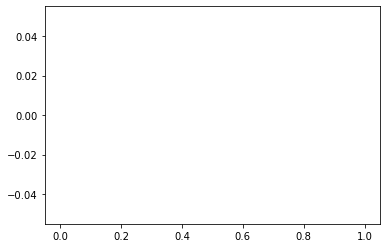

99059
97499


In [27]:
print(len(ff))
wz = ff['LOCATION_ASSIGNED'] == 1
print(len(ff[wz]))
print(np.unique(ff[wz]['ZWARN']))
wz &= ff['ZWARN'] != 999999
wz &= ff['ZWARN']*0 == 0
print(len(ff[wz]))
wz = ff['ZWARN'] == 0
print(len(ff[wz]))
wz &= ff['DELTACHI2'] > 16
print(len(ff[wz]))
wz = ff['ZWARN']*0 == 0
wz &= ff['ZWARN'] != 999999
wa = ff['LOCATION_ASSIGNED'] == 1
ww = wa & ~wz
print(len(ff[ww]))
plt.hist(ff[ww]['Z'])
plt.show()
print(len(ff[wz]))
wz &= ff['ZWARN'] == 0
print(len(ff[wz]))


In [67]:
np.max(ff[wz]['Z'])

5.990724067077254

In [41]:
np.unique(ff[~wz]['Z'])

array([1.e+20])

In [72]:
len(np.unique(ff[wz]['TILELOCID']))

97079

In [73]:
len(ff[wz])

97079

In [74]:
np.array_equal(ff[wz]['LOCATION'], ff[wz]['LOCATION_AVAIL'])

True

In [49]:
ld = ff[wz]['LOCATION'] - ff[wz]['LOCATION_AVAIL']

In [50]:
np.unique(ld,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 array([86092,  2180,    27,    45,    41,    92,    98,   121,   183,
          158,   142,   168,   234,   230,   244,   284,   228,   248,
          330,   309,   276,   444,   343,   162]))

In [45]:
ff.dtype.names

('TARGETID',
 'FIBER',
 'LOCATION_AVAIL',
 'RA',
 'DEC',
 'REF_EPOCH',
 'PARALLAX',
 'PMRA',
 'PMDEC',
 'SV3_DESI_TARGET',
 'SV3_BGS_TARGET',
 'SV3_MWS_TARGET',
 'SUBPRIORITY',
 'OBSCONDITIONS',
 'PRIORITY_INIT',
 'NUMOBS_INIT',
 'SV3_SCND_TARGET',
 'NUMOBS_MORE',
 'NUMOBS',
 'ZTILEID',
 'TARGET_STATE',
 'TIMESTAMP',
 'VERSION',
 'RELEASE',
 'BRICKID',
 'BRICKNAME',
 'BRICK_OBJID',
 'MORPHTYPE',
 'EBV',
 'FLUX_G',
 'FLUX_R',
 'FLUX_Z',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_Z',
 'MW_TRANSMISSION_G',
 'MW_TRANSMISSION_R',
 'MW_TRANSMISSION_Z',
 'FRACFLUX_G',
 'FRACFLUX_R',
 'FRACFLUX_Z',
 'FRACMASKED_G',
 'FRACMASKED_R',
 'FRACMASKED_Z',
 'FRACIN_G',
 'FRACIN_R',
 'FRACIN_Z',
 'NOBS_G',
 'NOBS_R',
 'NOBS_Z',
 'PSFDEPTH_G',
 'PSFDEPTH_R',
 'PSFDEPTH_Z',
 'GALDEPTH_G',
 'GALDEPTH_R',
 'GALDEPTH_Z',
 'FLUX_W1',
 'FLUX_W2',
 'FLUX_IVAR_W1',
 'FLUX_IVAR_W2',
 'MW_TRANSMISSION_W1',
 'MW_TRANSMISSION_W2',
 'ALLMASK_G',
 'ALLMASK_R',
 'ALLMASK_Z',
 'FIBERFLUX_G',
 'FIBERFLUX_R',
 'FIBERFLU

In [62]:
f = fitsio.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/LSScats/test/ALL1_full.dat.fits')

In [52]:
f.dtype.names

('TARGETID',
 'FIBER',
 'LOCATION_AVAIL',
 'RA',
 'DEC',
 'REF_EPOCH',
 'PARALLAX',
 'PMRA',
 'PMDEC',
 'SV3_DESI_TARGET',
 'SV3_BGS_TARGET',
 'SV3_MWS_TARGET',
 'SUBPRIORITY',
 'OBSCONDITIONS',
 'PRIORITY_INIT',
 'NUMOBS_INIT',
 'SV3_SCND_TARGET',
 'NUMOBS_MORE',
 'NUMOBS',
 'ZTILEID',
 'TARGET_STATE',
 'TIMESTAMP',
 'VERSION',
 'RELEASE',
 'BRICKID',
 'BRICKNAME',
 'BRICK_OBJID',
 'MORPHTYPE',
 'EBV',
 'FLUX_G',
 'FLUX_R',
 'FLUX_Z',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_Z',
 'MW_TRANSMISSION_G',
 'MW_TRANSMISSION_R',
 'MW_TRANSMISSION_Z',
 'FRACFLUX_G',
 'FRACFLUX_R',
 'FRACFLUX_Z',
 'FRACMASKED_G',
 'FRACMASKED_R',
 'FRACMASKED_Z',
 'FRACIN_G',
 'FRACIN_R',
 'FRACIN_Z',
 'NOBS_G',
 'NOBS_R',
 'NOBS_Z',
 'PSFDEPTH_G',
 'PSFDEPTH_R',
 'PSFDEPTH_Z',
 'GALDEPTH_G',
 'GALDEPTH_R',
 'GALDEPTH_Z',
 'FLUX_W1',
 'FLUX_W2',
 'FLUX_IVAR_W1',
 'FLUX_IVAR_W2',
 'MW_TRANSMISSION_W1',
 'MW_TRANSMISSION_W2',
 'ALLMASK_G',
 'ALLMASK_R',
 'ALLMASK_Z',
 'FIBERFLUX_G',
 'FIBERFLUX_R',
 'FIBERFLU

In [63]:
wz = f['LOCATION_ASSIGNED'] == 1

In [64]:
ld = f[wz]['LOCATION'] - f[wz]['LOCATION_AVAIL']

In [65]:
np.unique(ld)

array([0])

In [57]:
len(ld)

3256

49523
49523
49398
49398


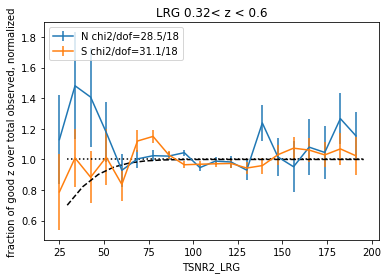

In [43]:
efac = 1#8.60
zmin = 0.32
zmax = 0.6
frl = [.225,.235]
regl = ['N','S']
for fr,reg in zip(frl,regl):
    wa = ff['LOCATION_ASSIGNED'] == 1
    wa &= ff['FIBERSTATUS'] == 0
    wa &= ff['TSNR2_LRG'] != 1e20
    wa &= ff['PHOTSYS'] == reg
    wgh = wa.copy()
    wgh &= ff['ZWARN'] == 0
    print(len(ff[wa]))
    wgh &= ff['Z'] > zmin
    wgh &= ff['Z'] < zmax
    print(len(ff[wa]))
    ffo = ff[wa]
    ffz = ff[wgh]
    rng = (25,200)
    nb = 20
    a = np.histogram(ffz['TSNR2_LRG'],bins=nb,range=rng)
    b = np.histogram(ffo['TSNR2_LRG'],bins=a[1])
    #plt.clf()
    dl = a[0]/b[0]/fr
    el = np.sqrt(a[0])/b[0]/fr
    vs = a[1][:-1]+bs/2.
    ol = np.ones(len(vs))#*0.74
    em = erf(vs/40)

    chi2 = np.sum((dl-1)**2./el**2.)
    plt.errorbar(a[1][:-1]*efac,dl,el,label=reg+' chi2/dof='+str(round(chi2,1))+'/'+str(nb-2))#,fmt='ko')
bs = (rng[1]-rng[0])/nb

ol = np.ones(len(vs))#*0.54
plt.plot(vs*efac,ol,'k:')
plt.plot(vs*efac,em,'k--')             
plt.title('LRG '+str(zmin)+'< z < '+str(zmax))
plt.xlabel('TSNR2_LRG')
plt.ylabel('fraction of good z over total observed, normalized')
plt.legend(loc='upper left')
plt.show()  

98921
98921


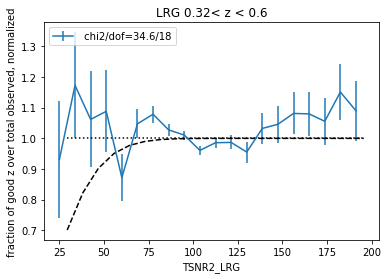

In [64]:
efac = 1#8.60
zmin = 0.32
zmax = 0.6
fr = .228
regl = ['N','S']
#for fr,reg in zip(frl,regl):
wa = ff['LOCATION_ASSIGNED'] == 1
wa &= ff['FIBERSTATUS'] == 0
wa &= ff['TSNR2_LRG'] != 1e20
#wa &= ff['PHOTSYS'] == reg
wgh = wa.copy()
wgh &= ff['ZWARN'] == 0
wgh &= ff['DELTACHI2'] > 16
print(len(ff[wa]))
wgh &= ff['Z'] > zmin
wgh &= ff['Z'] < zmax
print(len(ff[wa]))
ffo = ff[wa]
ffz = ff[wgh]
rng = (25,200)
nb = 20
a = np.histogram(ffz['TSNR2_LRG'],bins=nb,range=rng)
b = np.histogram(ffo['TSNR2_LRG'],bins=a[1])
#plt.clf()
dl = a[0]/b[0]/fr
el = np.sqrt(a[0])/b[0]/fr
vs = a[1][:-1]+bs/2.
ol = np.ones(len(vs))#*0.74
em = erf(vs/40)

chi2 = np.sum((dl-1)**2./el**2.)
plt.errorbar(a[1][:-1]*efac,dl,el,label=' chi2/dof='+str(round(chi2,1))+'/'+str(nb-2))#,fmt='ko')
bs = (rng[1]-rng[0])/nb

ol = np.ones(len(vs))#*0.54
plt.plot(vs*efac,ol,'k:')
plt.plot(vs*efac,em,'k--')             
plt.title('LRG '+str(zmin)+'< z < '+str(zmax))
plt.xlabel('TSNR2_LRG')
plt.ylabel('fraction of good z over total observed, normalized')
plt.legend(loc='upper left')
plt.show()  

98921
98921


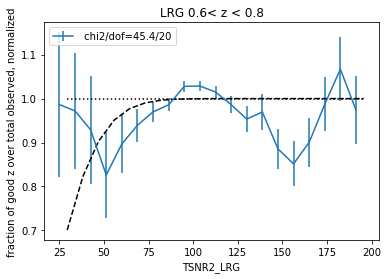

In [71]:
efac = 1#8.60
zmin = 0.6
zmax = 0.8
fr = .323
regl = ['N','S']
#for fr,reg in zip(frl,regl):
wa = ff['LOCATION_ASSIGNED'] == 1
wa &= ff['FIBERSTATUS'] == 0
wa &= ff['TSNR2_LRG'] != 1e20
#wa &= ff['PHOTSYS'] == reg
wgh = wa.copy()
wgh &= ff['ZWARN'] == 0
wgh &= ff['DELTACHI2'] > 16
print(len(ff[wa]))
wgh &= ff['Z'] > zmin
wgh &= ff['Z'] < zmax
print(len(ff[wa]))
ffo = ff[wa]
ffz = ff[wgh]
rng = (25,200)
nb = 20
a = np.histogram(ffz['TSNR2_LRG'],bins=nb,range=rng)
b = np.histogram(ffo['TSNR2_LRG'],bins=a[1])
#plt.clf()
dl = a[0]/b[0]/fr
el = np.sqrt(a[0])/b[0]/fr
vs = a[1][:-1]+bs/2.
ol = np.ones(len(vs))#*0.74
em = erf(vs/40)

chi2 = np.sum((dl-1)**2./el**2.)
plt.errorbar(a[1][:-1]*efac,dl,el,label=' chi2/dof='+str(round(chi2,1))+'/'+str(nb))#,fmt='ko')
bs = (rng[1]-rng[0])/nb

ol = np.ones(len(vs))#*0.54
plt.plot(vs*efac,ol,'k:')
plt.plot(vs*efac,em,'k--')             
plt.title('LRG '+str(zmin)+'< z < '+str(zmax))
plt.xlabel('TSNR2_LRG')
plt.ylabel('fraction of good z over total observed, normalized')
plt.legend(loc='upper left')
plt.show()  

98921
98921


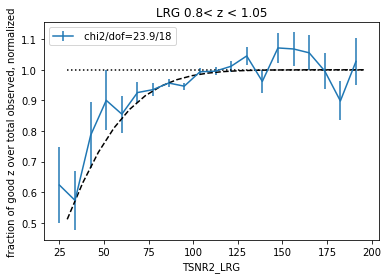

In [57]:
efac = 1#8.60
zmin = 0.8
zmax = 1.05
fr = .355
regl = ['N','S']
#for fr,reg in zip(frl,regl):
wa = ff['LOCATION_ASSIGNED'] == 1
wa &= ff['FIBERSTATUS'] == 0
wa &= ff['TSNR2_LRG'] != 1e20
#wa &= ff['PHOTSYS'] == reg
wgh = wa.copy()
wgh &= ff['ZWARN'] == 0
print(len(ff[wa]))
wgh &= ff['Z'] > zmin
wgh &= ff['Z'] < zmax
print(len(ff[wa]))
ffo = ff[wa]
ffz = ff[wgh]
rng = (25,200)
nb = 20
a = np.histogram(ffz['TSNR2_LRG'],bins=nb,range=rng)
b = np.histogram(ffo['TSNR2_LRG'],bins=a[1])
#plt.clf()
dl = a[0]/b[0]/fr
el = np.sqrt(a[0])/b[0]/fr
vs = a[1][:-1]+bs/2.
ol = np.ones(len(vs))#*0.74
em = erf(vs/60)

chi2 = np.sum((dl-em)**2./el**2.)
plt.errorbar(a[1][:-1]*efac,dl,el,label=' chi2/dof='+str(round(chi2,1))+'/'+str(nb-2))#,fmt='ko')
bs = (rng[1]-rng[0])/nb

ol = np.ones(len(vs))#*0.54
plt.plot(vs*efac,ol,'k:')
plt.plot(vs*efac,em,'k--')             
plt.title('LRG '+str(zmin)+'< z < '+str(zmax))
plt.xlabel('TSNR2_LRG')
plt.ylabel('fraction of good z over total observed, normalized')
plt.legend(loc='upper left')
plt.show()  

In [4]:
fibfluxz = ff['FIBERFLUX_Z']/ff['MW_TRANSMISSION_Z']

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 7632., 9964., 7996., 6678., 5594., 4782., 4239., 3801.,
        3350., 3089., 2785., 2491., 2513., 2265., 2046., 1879., 1785.,
        1647., 1521., 1463., 1302., 1236., 1273., 1131., 1064.,  969.,
         971.,  850.,  852.,  810.,  692.,  740.,  688.,  613.,  590.,
         600.,  508.,  486.,  445.,  482.,  435.,  395.,  381.,  393.,
         372.,  327.,  307.,  318.,  280.,  305.,  259.,  233.,  242.,
         238.,  252.,  231.,  196.,  197.,  202.,  196.,  171.,  182.,
         157.,  148.,  157.,  143.,  142.,  140.,  136.,  130.,  126.,
         116.,  123.,  113.,  118.,  110.,  107.,  101.,  118.,  115.,
          93.,   82.,   97.,   72.,   89.,   70.,   84.,   79.,   70.,
          80.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
         2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
         4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8

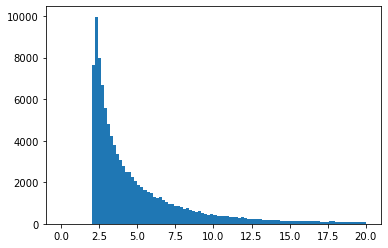

In [116]:
plt.hist(fibfluxz,bins=100,range=(0,20))

98921
97676


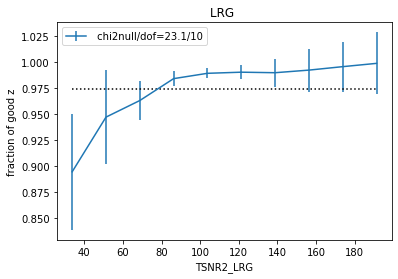

In [20]:
efac = 1#8.60
regl = ['N','S']
#for fr,reg in zip(frl,regl):
wa = ff['LOCATION_ASSIGNED'] == 1
wa &= ff['FIBERSTATUS'] == 0
wa &= ff['TSNR2_LRG'] != 1e20
#wa &= fibfluxz < 100
#wa &= ff['PHOTSYS'] == reg
wgh = wa & (ff['ZWARN'] == 0)
print(len(ff[wa]))
#wgh &= ff['Z'] > zmin
#wgh &= ff['Z'] < zmax

print(len(ff[wgh]))
ffo = ff[wa]
ffz = ff[wgh]
rng = (25,200)
nb = 10
bs = (rng[1]-rng[0])/nb
a = np.histogram(ffz['TSNR2_LRG'],bins=nb,range=rng)
b = np.histogram(ffo['TSNR2_LRG'],bins=a[1])
#plt.clf()
fr = np.mean(a[0]/b[0])
dl = a[0]/b[0]#/fr
el = np.sqrt(a[0])/b[0]#/fr
vs = a[1][:-1]+bs/2.
ol = np.ones(len(vs))#*0.74
em = erf(vs/60)

chi2null = np.sum((dl-fr)**2./el**2.)
plt.errorbar(a[1][:-1]*efac+bs/2.,dl,el,label=' chi2null/dof='+str(round(chi2null,1))+'/'+str(nb))#,fmt='ko')


ol = np.ones(len(vs))*fr#*0.54
plt.plot(vs*efac,ol,'k:')
#plt.plot(vs*efac,em,'k--')             
plt.title('LRG ')
plt.xlabel('TSNR2_LRG')
plt.ylabel('fraction of good z')
plt.legend(loc='upper left')
plt.show()  

98921
97676
0.9874141992094702


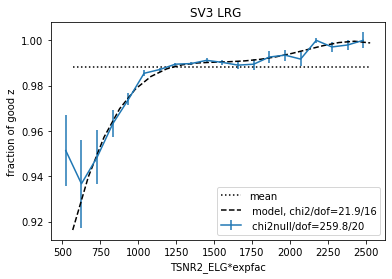

In [9]:
efac = 8.60
wa = ff['LOCATION_ASSIGNED'] == 1
wa &= ff['FIBERSTATUS'] == 0
wa &= ff['TSNR2_LRG'] != 1e20
wgh = wa & (ff['ZWARN'] == 0)
print(len(ff[wa]))
#wgh &= ff['Z'] > zmin
#wgh &= ff['Z'] < zmax

print(len(ff[wgh]))
ffo = ff[wa]
ffz = ff[wgh]
print(len(ffz)/len(ffo))
rng = (60,300)
nb = 20
bs = (rng[1]-rng[0])/nb
a = np.histogram(ffz['TSNR2_ELG'],bins=nb,range=rng)
b = np.histogram(ffo['TSNR2_ELG'],bins=a[1])
#plt.clf()
fr = np.sum(a[0])/np.sum(b[0])
dl = a[0]/b[0]#/fr
varl = dl*b[0]*(1.-dl) #variance for binomial distribution
wv = varl == 0
varl[wv] = 1
el = np.sqrt(varl)/b[0]#/fr
#el = np.sqrt(b[0]-a[0])/b[0]
#(nt*nnwt/nt*(1.-nnwt/nt))**.5/nt

vs = a[1][:-1]+bs/2.
ol = np.ones(len(vs))#*0.74
deg = 4
coeff = np.polyfit(vs,1-dl,deg,w=1/el)
#em = erf((vs)/50)*.975
em = np.zeros(len(vs))
for i in range(0,deg+1):
    em += coeff[i]*vs**(deg-i)
#em = coeff[0]*vs**4+coeff[1]*vs**3+coeff[2]*vs**2.+coeff[3]*vs +coeff[4]
chi2null = np.sum((dl-fr)**2./el**2.)
chi2m = np.sum((dl+em-1)**2./el**2.)
plt.errorbar(a[1][:-1]*efac+bs/2.,dl,el,label=' chi2null/dof='+str(round(chi2null,1))+'/'+str(nb))#,fmt='ko')


ol = np.ones(len(vs))*fr#*0.54
plt.plot(vs*efac,ol,'k:',label='mean')
plt.plot(vs*efac,1-em,'k--',label=' model, chi2/dof='+str(round(chi2m,1))+'/'+str(nb-deg))             
plt.title('SV3 LRG ')
plt.xlabel('TSNR2_ELG*expfac')
plt.ylabel('fraction of good z')
plt.legend(loc='lower right')
plt.show()  

98921
97676
0.9874141992094702


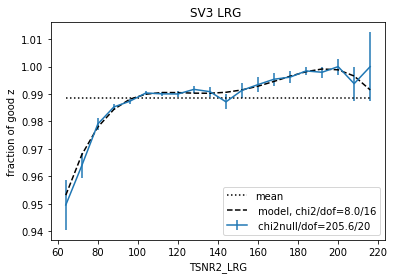

In [8]:
efac = 1#8.60
wa = ff['LOCATION_ASSIGNED'] == 1
wa &= ff['FIBERSTATUS'] == 0
wa &= ff['TSNR2_LRG'] != 1e20
wgh = wa & (ff['ZWARN'] == 0)
print(len(ff[wa]))
#wgh &= ff['Z'] > zmin
#wgh &= ff['Z'] < zmax

print(len(ff[wgh]))
ffo = ff[wa]
ffz = ff[wgh]
print(len(ffz)/len(ffo))
rng = (60,220)
nb = 20
bs = (rng[1]-rng[0])/nb
a = np.histogram(ffz['TSNR2_LRG'],bins=nb,range=rng)
b = np.histogram(ffo['TSNR2_LRG'],bins=a[1])
#plt.clf()
fr = np.sum(a[0])/np.sum(b[0])
dl = a[0]/b[0]#/fr
varl = dl*b[0]*(1.-dl) #variance for binomial distribution
wv = varl == 0
varl[wv] = 1
el = np.sqrt(varl)/b[0]#/fr
#el = np.sqrt(b[0]-a[0])/b[0]
#(nt*nnwt/nt*(1.-nnwt/nt))**.5/nt

vs = a[1][:-1]+bs/2.
ol = np.ones(len(vs))#*0.74
deg = 4
coeff = np.polyfit(vs,1-dl,deg,w=1/el)
#em = erf((vs)/50)*.975
em = np.zeros(len(vs))
for i in range(0,deg+1):
    em += coeff[i]*vs**(deg-i)
#em = coeff[0]*vs**4+coeff[1]*vs**3+coeff[2]*vs**2.+coeff[3]*vs +coeff[4]
chi2null = np.sum((dl-fr)**2./el**2.)
chi2m = np.sum((dl+em-1)**2./el**2.)
plt.errorbar(a[1][:-1]*efac+bs/2.,dl,el,label=' chi2null/dof='+str(round(chi2null,1))+'/'+str(nb))#,fmt='ko')


ol = np.ones(len(vs))*fr#*0.54
plt.plot(vs*efac,ol,'k:',label='mean')
plt.plot(vs*efac,1-em,'k--',label=' model, chi2/dof='+str(round(chi2m,1))+'/'+str(nb-deg))             
plt.title('SV3 LRG ')
plt.xlabel('TSNR2_LRG')
plt.ylabel('fraction of good z')
plt.legend(loc='lower right')
plt.show()  

45877
44805
0.9766331713058831


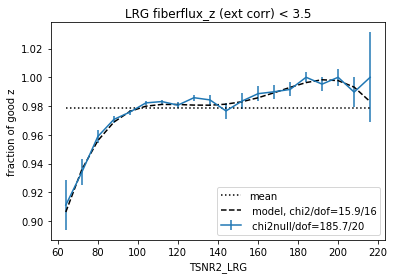

53044
52871
0.9967385566699344


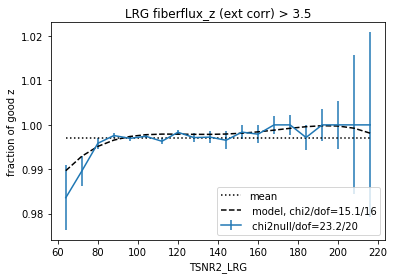

In [123]:
efac = 1#8.60
nl = [0,1]
#for fr,reg in zip(frl,regl):
for c in nl:
    wa = ff['LOCATION_ASSIGNED'] == 1
    wa &= ff['FIBERSTATUS'] == 0
    wa &= ff['TSNR2_LRG'] != 1e20
    fx = 3.5
    if c == 0:
        wa &= fibfluxz < fx
        ef = 2
    if c == 1:
        wa &= fibfluxz > fx
        ef = 0.22
    #wa &= ff['PHOTSYS'] == reg
    wgh = wa & (ff['ZWARN'] == 0)
    print(len(ff[wa]))
    #wgh &= ff['Z'] > zmin
    #wgh &= ff['Z'] < zmax

    print(len(ff[wgh]))
    ffo = ff[wa]
    ffz = ff[wgh]
    print(len(ffz)/len(ffo))
    rng = (60,220)
    nb = 20
    bs = (rng[1]-rng[0])/nb
    a = np.histogram(ffz['TSNR2_LRG'],bins=nb,range=rng)
    b = np.histogram(ffo['TSNR2_LRG'],bins=a[1])
    #plt.clf()
    fr = np.sum(a[0])/np.sum(b[0])
    dl = a[0]/b[0]#/fr
    varl = dl*b[0]*(1.-dl) #variance for binomial distribution
    wv = varl == 0
    varl[wv] = 1
    el = np.sqrt(varl)/b[0]#/fr
    #el = np.sqrt(b[0]-a[0])/b[0]
    #(nt*nnwt/nt*(1.-nnwt/nt))**.5/nt

    vs = a[1][:-1]+bs/2.
    ol = np.ones(len(vs))#*0.74
    #deg = 4
    #coeff = np.polyfit(vs,dl,deg,w=1/el)
    #em = erf((vs)/50)*.975
    #em = np.zeros(len(vs))
    #for i in range(0,deg+1):
    #    em += coeff[i]*vs**(deg-i)
    #em = coeff[0]*vs**4+coeff[1]*vs**3+coeff[2]*vs**2.+coeff[3]*vs +coeff[4]
    chi2null = np.sum((dl-fr)**2./el**2.)
    chi2m = np.sum((dl+em*ef-1)**2./el**2.)
    plt.errorbar(a[1][:-1]*efac+bs/2.,dl,el,label=' chi2null/dof='+str(round(chi2null,1))+'/'+str(nb))#,fmt='ko')


    ol = np.ones(len(vs))*fr#*0.54
    plt.plot(vs*efac,ol,'k:',label='mean')
    plt.plot(vs*efac,1-em*ef,'k--',label=' model, chi2/dof='+str(round(chi2m,1))+'/'+str(nb-deg))             
    if c == 0:
        plt.title('LRG fiberflux_z (ext corr) < '+str(fx))
    else:
        plt.title('LRG fiberflux_z (ext corr) > '+str(fx))
    plt.xlabel('TSNR2_LRG')
    plt.ylabel('fraction of good z')
    plt.legend(loc='lower right')
    plt.show()  

45877
44805
0.9766331713058831


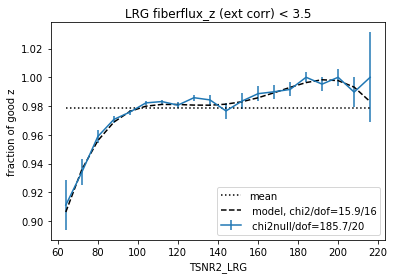

53044
52871
0.9967385566699344


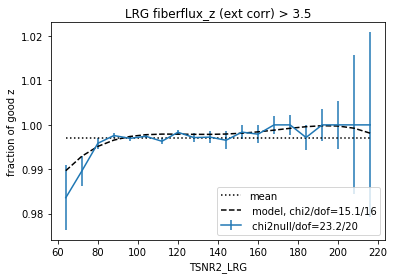

In [123]:
efac = 1#8.60
nl = [0,1]
#for fr,reg in zip(frl,regl):
for c in nl:
    wa = ff['LOCATION_ASSIGNED'] == 1
    wa &= ff['FIBERSTATUS'] == 0
    wa &= ff['TSNR2_LRG'] != 1e20
    fx = 3.5
    if c == 0:
        wa &= fibfluxz < fx
        ef = 2
    if c == 1:
        wa &= fibfluxz > fx
        ef = 0.22
    #wa &= ff['PHOTSYS'] == reg
    wgh = wa & (ff['ZWARN'] == 0)
    print(len(ff[wa]))
    #wgh &= ff['Z'] > zmin
    #wgh &= ff['Z'] < zmax

    print(len(ff[wgh]))
    ffo = ff[wa]
    ffz = ff[wgh]
    print(len(ffz)/len(ffo))
    rng = (60,220)
    nb = 20
    bs = (rng[1]-rng[0])/nb
    a = np.histogram(ffz['TSNR2_LRG'],bins=nb,range=rng)
    b = np.histogram(ffo['TSNR2_LRG'],bins=a[1])
    #plt.clf()
    fr = np.sum(a[0])/np.sum(b[0])
    dl = a[0]/b[0]#/fr
    varl = dl*b[0]*(1.-dl) #variance for binomial distribution
    wv = varl == 0
    varl[wv] = 1
    el = np.sqrt(varl)/b[0]#/fr
    #el = np.sqrt(b[0]-a[0])/b[0]
    #(nt*nnwt/nt*(1.-nnwt/nt))**.5/nt

    vs = a[1][:-1]+bs/2.
    ol = np.ones(len(vs))#*0.74
    #deg = 4
    #coeff = np.polyfit(vs,dl,deg,w=1/el)
    #em = erf((vs)/50)*.975
    #em = np.zeros(len(vs))
    #for i in range(0,deg+1):
    #    em += coeff[i]*vs**(deg-i)
    #em = coeff[0]*vs**4+coeff[1]*vs**3+coeff[2]*vs**2.+coeff[3]*vs +coeff[4]
    chi2null = np.sum((dl-fr)**2./el**2.)
    chi2m = np.sum((dl+em*ef-1)**2./el**2.)
    plt.errorbar(a[1][:-1]*efac+bs/2.,dl,el,label=' chi2null/dof='+str(round(chi2null,1))+'/'+str(nb))#,fmt='ko')


    ol = np.ones(len(vs))*fr#*0.54
    plt.plot(vs*efac,ol,'k:',label='mean')
    plt.plot(vs*efac,1-em*ef,'k--',label=' model, chi2/dof='+str(round(chi2m,1))+'/'+str(nb-deg))             
    if c == 0:
        plt.title('LRG fiberflux_z (ext corr) < '+str(fx))
    else:
        plt.title('LRG fiberflux_z (ext corr) > '+str(fx))
    plt.xlabel('TSNR2_LRG')
    plt.ylabel('fraction of good z')
    plt.legend(loc='lower right')
    plt.show()  

In [108]:
wa = ff['LOCATION_ASSIGNED'] == 1
wa &= ff['FIBERSTATUS'] == 0
wa &= ff['TSNR2_LRG'] != 1e20
wz = wa & (ff['TSNR2_LRG'] > 60)
print(len(ff[wz])/len(ff[wa]))

0.9898504867520547


39125
39035
0.9976996805111821


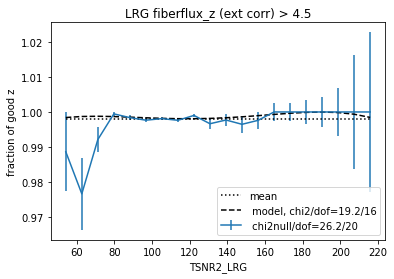

In [90]:
efac = 1#8.60
regl = ['N','S']
#for fr,reg in zip(frl,regl):
wa = ff['LOCATION_ASSIGNED'] == 1
wa &= ff['FIBERSTATUS'] == 0
wa &= ff['TSNR2_LRG'] != 1e20
wa &= fibfluxz > 4.5
#wa &= fibfluxz < 3.5
#wa &= ff['PHOTSYS'] == reg
wgh = wa & (ff['ZWARN'] == 0)
print(len(ff[wa]))
#wgh &= ff['Z'] > zmin
#wgh &= ff['Z'] < zmax

print(len(ff[wgh]))
ffo = ff[wa]
ffz = ff[wgh]
print(len(ffz)/len(ffo))
rng = (50,220)
nb = 20
bs = (rng[1]-rng[0])/nb
a = np.histogram(ffz['TSNR2_LRG'],bins=nb,range=rng)
b = np.histogram(ffo['TSNR2_LRG'],bins=a[1])
#plt.clf()
fr = np.sum(a[0])/np.sum(b[0])
dl = a[0]/b[0]#/fr
varl = dl*b[0]*(1.-dl) #variance for binomial distribution
wv = varl == 0
varl[wv] = 1
el = np.sqrt(varl)/b[0]#/fr
#el = np.sqrt(b[0]-a[0])/b[0]
#(nt*nnwt/nt*(1.-nnwt/nt))**.5/nt

vs = a[1][:-1]+bs/2.
ol = np.ones(len(vs))#*0.74
deg = 4
coeff = np.polyfit(vs,dl,deg,w=1/el)
#em = erf((vs)/50)*.975
em = np.zeros(len(vs))
for i in range(0,deg+1):
    em += coeff[i]*vs**(deg-i)
#em = coeff[0]*vs**4+coeff[1]*vs**3+coeff[2]*vs**2.+coeff[3]*vs +coeff[4]
chi2null = np.sum((dl-fr)**2./el**2.)
chi2m = np.sum((dl-em)**2./el**2.)
plt.errorbar(a[1][:-1]*efac+bs/2.,dl,el,label=' chi2null/dof='+str(round(chi2null,1))+'/'+str(nb))#,fmt='ko')


ol = np.ones(len(vs))*fr#*0.54
plt.plot(vs*efac,ol,'k:',label='mean')
plt.plot(vs*efac,em,'k--',label=' model, chi2/dof='+str(round(chi2m,1))+'/'+str(nb-deg))             
plt.title('LRG fiberflux_z (ext corr) > 4.5')
plt.xlabel('TSNR2_LRG')
plt.ylabel('fraction of good z')
plt.legend(loc='lower right')
plt.show()  

39290
38856
0.9889539322982948


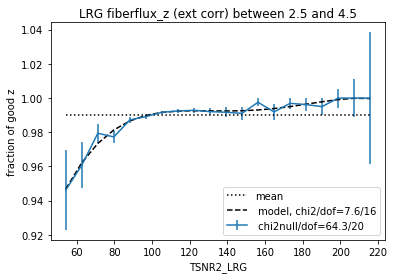

In [89]:
efac = 1#8.60
regl = ['N','S']
#for fr,reg in zip(frl,regl):
wa = ff['LOCATION_ASSIGNED'] == 1
wa &= ff['FIBERSTATUS'] == 0
wa &= ff['TSNR2_LRG'] != 1e20
wa &= fibfluxz > 2.5
wa &= fibfluxz < 4.5
#wa &= ff['PHOTSYS'] == reg
wgh = wa & (ff['ZWARN'] == 0)
print(len(ff[wa]))
#wgh &= ff['Z'] > zmin
#wgh &= ff['Z'] < zmax

print(len(ff[wgh]))
ffo = ff[wa]
ffz = ff[wgh]
print(len(ffz)/len(ffo))
rng = (50,220)
nb = 20
bs = (rng[1]-rng[0])/nb
a = np.histogram(ffz['TSNR2_LRG'],bins=nb,range=rng)
b = np.histogram(ffo['TSNR2_LRG'],bins=a[1])
#plt.clf()
fr = np.sum(a[0])/np.sum(b[0])
dl = a[0]/b[0]#/fr
varl = dl*b[0]*(1.-dl) #variance for binomial distribution
wv = varl == 0
varl[wv] = 1
el = np.sqrt(varl)/b[0]#/fr
#el = np.sqrt(b[0]-a[0])/b[0]
#(nt*nnwt/nt*(1.-nnwt/nt))**.5/nt

vs = a[1][:-1]+bs/2.
ol = np.ones(len(vs))#*0.74
deg = 4
coeff = np.polyfit(vs,dl,deg)
#em = erf((vs)/50)*.975
em = np.zeros(len(vs))
for i in range(0,deg+1):
    em += coeff[i]*vs**(deg-i)
#em = coeff[0]*vs**4+coeff[1]*vs**3+coeff[2]*vs**2.+coeff[3]*vs +coeff[4]
chi2null = np.sum((dl-fr)**2./el**2.)
chi2m = np.sum((dl-em)**2./el**2.)
plt.errorbar(a[1][:-1]*efac+bs/2.,dl,el,label=' chi2null/dof='+str(round(chi2null,1))+'/'+str(nb))#,fmt='ko')


ol = np.ones(len(vs))*fr#*0.54
plt.plot(vs*efac,ol,'k:',label='mean')
plt.plot(vs*efac,em,'k--',label=' model, chi2/dof='+str(round(chi2m,1))+'/'+str(nb-deg))             
plt.title('LRG fiberflux_z (ext corr) between 2.5 and 4.5')
plt.xlabel('TSNR2_LRG')
plt.ylabel('fraction of good z')
plt.legend(loc='lower right')
plt.show()  

20506
19785


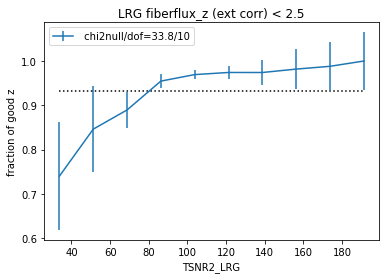

In [23]:
efac = 1#8.60
regl = ['N','S']
#for fr,reg in zip(frl,regl):
wa = ff['LOCATION_ASSIGNED'] == 1
wa &= ff['FIBERSTATUS'] == 0
wa &= ff['TSNR2_LRG'] != 1e20
wa &= fibfluxz < 2.5
#wa &= ff['PHOTSYS'] == reg
wgh = wa & (ff['ZWARN'] == 0)
print(len(ff[wa]))
#wgh &= ff['Z'] > zmin
#wgh &= ff['Z'] < zmax

print(len(ff[wgh]))
ffo = ff[wa]
ffz = ff[wgh]
rng = (25,200)
nb = 10
bs = (rng[1]-rng[0])/nb
a = np.histogram(ffz['TSNR2_LRG'],bins=nb,range=rng)
b = np.histogram(ffo['TSNR2_LRG'],bins=a[1])
#plt.clf()
fr = np.mean(a[0]/b[0])
dl = a[0]/b[0]#/fr
el = np.sqrt(a[0])/b[0]#/fr
vs = a[1][:-1]+bs/2.
ol = np.ones(len(vs))#*0.74
em = erf(vs/60)

chi2null = np.sum((dl-fr)**2./el**2.)
plt.errorbar(a[1][:-1]*efac+bs/2.,dl,el,label=' chi2null/dof='+str(round(chi2null,1))+'/'+str(nb))#,fmt='ko')


ol = np.ones(len(vs))*fr#*0.54
plt.plot(vs*efac,ol,'k:')
#plt.plot(vs*efac,em,'k--')             
plt.title('LRG fiberflux_z (ext corr) < 2.5')
plt.xlabel('TSNR2_LRG')
plt.ylabel('fraction of good z')
plt.legend(loc='upper left')
plt.show()  

53044
52871


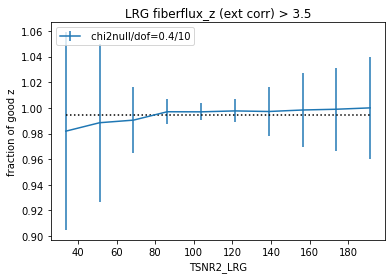

In [22]:
efac = 1#8.60
regl = ['N','S']
#for fr,reg in zip(frl,regl):
wa = ff['LOCATION_ASSIGNED'] == 1
wa &= ff['FIBERSTATUS'] == 0
wa &= ff['TSNR2_LRG'] != 1e20
wa &= fibfluxz > 3.5
#wa &= ff['PHOTSYS'] == reg
wgh = wa & (ff['ZWARN'] == 0)
print(len(ff[wa]))
#wgh &= ff['Z'] > zmin
#wgh &= ff['Z'] < zmax

print(len(ff[wgh]))
ffo = ff[wa]
ffz = ff[wgh]
rng = (25,200)
nb = 10
bs = (rng[1]-rng[0])/nb
a = np.histogram(ffz['TSNR2_LRG'],bins=nb,range=rng)
b = np.histogram(ffo['TSNR2_LRG'],bins=a[1])
#plt.clf()
fr = np.mean(a[0]/b[0])
dl = a[0]/b[0]#/fr
el = np.sqrt(a[0])/b[0]#/fr
vs = a[1][:-1]+bs/2.
ol = np.ones(len(vs))#*0.74
em = erf(vs/60)

chi2null = np.sum((dl-fr)**2./el**2.)
plt.errorbar(a[1][:-1]*efac+bs/2.,dl,el,label=' chi2null/dof='+str(round(chi2null,1))+'/'+str(nb))#,fmt='ko')


ol = np.ones(len(vs))*fr#*0.54
plt.plot(vs*efac,ol,'k:')
#plt.plot(vs*efac,em,'k--')             
plt.title('LRG fiberflux_z (ext corr) > 3.5')
plt.xlabel('TSNR2_LRG')
plt.ylabel('fraction of good z')
plt.legend(loc='upper left')
plt.show()  

98921
21269


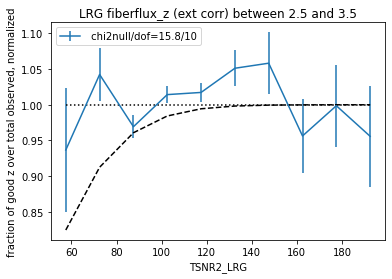

In [9]:
efac = 1#8.60
regl = ['N','S']
#for fr,reg in zip(frl,regl):
wa = ff['LOCATION_ASSIGNED'] == 1
wa &= ff['FIBERSTATUS'] == 0
wa &= ff['TSNR2_LRG'] != 1e20
#wa &= ff['PHOTSYS'] == reg
wgh = wa.copy()
wgh &= ff['ZWARN'] == 0
print(len(ff[wa]))
#wgh &= ff['Z'] > zmin
#wgh &= ff['Z'] < zmax
wgh &= fibfluxz > 2.5
wgh &= fibfluxz < 3.3
print(len(ff[wgh]))
ffo = ff[wa]
ffz = ff[wgh]
rng = (50,200)
nb = 10
bs = (rng[1]-rng[0])/nb
a = np.histogram(ffz['TSNR2_LRG'],bins=nb,range=rng)
b = np.histogram(ffo['TSNR2_LRG'],bins=a[1])
#plt.clf()
fr = np.mean(a[0]/b[0])
dl = a[0]/b[0]/fr
el = np.sqrt(a[0])/b[0]/fr
vs = a[1][:-1]+bs/2.
ol = np.ones(len(vs))#*0.74
em = erf(vs/60)

chi2null = np.sum((dl-1)**2./el**2.)
plt.errorbar(a[1][:-1]+bs/2,dl,el,label=' chi2null/dof='+str(round(chi2null,1))+'/'+str(nb))#,fmt='ko')


ol = np.ones(len(vs))#*0.54
plt.plot(vs*efac,ol,'k:')
plt.plot(vs*efac,em,'k--')             
plt.title('LRG fiberflux_z (ext corr) between 2.5 and 3.5')
plt.xlabel('TSNR2_LRG')
plt.ylabel('fraction of good z over total observed, normalized')
plt.legend(loc='upper left')
plt.show()  

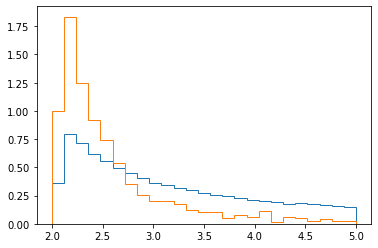

In [129]:
wa = ff['LOCATION_ASSIGNED'] == 1
wa &= ff['FIBERSTATUS'] == 0
wa &= ff['TSNR2_LRG'] != 1e20
wg = wa & (ff['ZWARN'] == 0)
wf = wa & (ff['ZWARN'] != 0)
plt.hist(fibfluxz[wg],bins=25,range=(2,5),density=True,histtype='step')
plt.hist(fibfluxz[wf],bins=25,range=(2,5),density=True,histtype='step')
plt.show()

In [127]:
np.unique(ff[wa]['ZWARN'])

array([   0,    4,   32,   36, 1024, 1056, 1060])

In [95]:
fc = fitsio.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/LSScats/test/LRGAlltiles_clustering.dat.fits')

In [78]:
fc.dtype.names

('TARGETID', 'RA', 'DEC', 'Z', 'TILES', 'rosette_number', 'NTILE', 'WEIGHT')

In [96]:
fcr = fitsio.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/LSScats/test/LRGAlltiles_0_clustering.ran.fits')

In [80]:
fcr.dtype.names

('TARGETID', 'RA', 'DEC', 'rosette_number', 'TILES', 'NTILE', 'Z', 'WEIGHT')

0.0 151.94056552203946
1.0 207.00794003057652
2.0 199.46677199565517
3.0 179.78035203851363
4.0 162.95399515738498
5.0 164.9615742327084
6.0 177.03916818090048
7.0 210.64195643867023
8.0 224.85600354452814
9.0 215.44775025648542
10.0 183.05313358061562
11.0 178.8560939085068
12.0 155.9828015830361
13.0 179.2897086235652
14.0 174.08193794334798
15.0 175.5590427618674


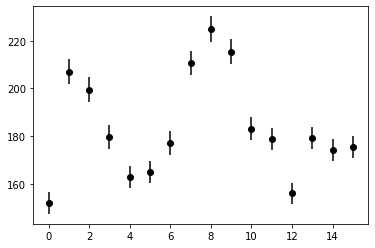

In [99]:
ros = np.unique(fc['rosette_number'])
zmin = 0.32
zmax = 0.6
rl = []
nl = []
el = []
for rs in ros:
    wd = fc['Z'] > zmin
    wd &= fc['Z'] < zmax
    wd &= fc['rosette_number'] == rs
    wr = fcr['rosette_number'] == rs
    #print(rs,np.sum(fc[wd]['WEIGHT'])/len(fcr[wr])*2500)
    rl.append(rs)
    ng = np.sum(fc[wd]['WEIGHT'])/len(fcr[wr])*2500
    nl.append(ng)
    el.append(ng*np.sqrt(len(fc[wd]['WEIGHT']))/len(fc[wd]['WEIGHT']))
plt.errorbar(rl,nl,el,fmt='ko')
plt.show()

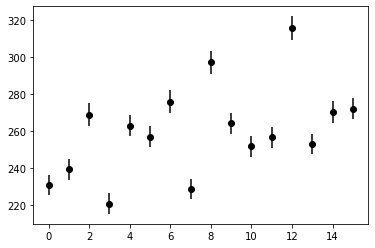

In [100]:
zmin = 0.6
zmax = 0.8
rl = []
nl = []
el = []
for rs in ros:
    wd = fc['Z'] > zmin
    wd &= fc['Z'] < zmax
    wd &= fc['rosette_number'] == rs
    wr = fcr['rosette_number'] == rs
    #print(rs,np.sum(fc[wd]['WEIGHT'])/len(fcr[wr])*2500)
    rl.append(rs)
    ng = np.sum(fc[wd]['WEIGHT'])/len(fcr[wr])*2500
    nl.append(ng)
    el.append(ng*np.sqrt(len(fc[wd]['WEIGHT']))/len(fc[wd]['WEIGHT']))
plt.errorbar(rl,nl,el,fmt='ko')
plt.show()

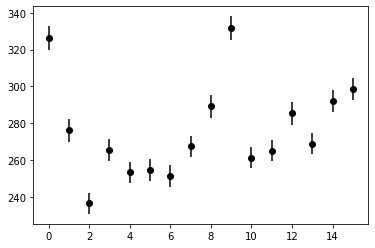

In [101]:
zmin = 0.8
zmax = 1.05
rl = []
nl = []
el = []
for rs in ros:
    wd = fc['Z'] > zmin
    wd &= fc['Z'] < zmax
    wd &= fc['rosette_number'] == rs
    wr = fcr['rosette_number'] == rs
    #print(rs,np.sum(fc[wd]['WEIGHT'])/len(fcr[wr])*2500)
    rl.append(rs)
    ng = np.sum(fc[wd]['WEIGHT'])/len(fcr[wr])*2500
    nl.append(ng)
    el.append(ng*np.sqrt(len(fc[wd]['WEIGHT']))/len(fc[wd]['WEIGHT']))
plt.errorbar(rl,nl,el,fmt='ko')
plt.show()

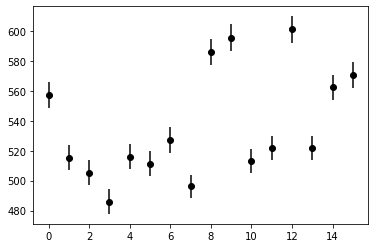

In [104]:
ros = np.unique(fc['rosette_number'])
zmin = 0.6
zmax = 1.05
rl = []
nl = []
el = []
ntm = 0
for rs in ros:
    wd = fc['Z'] > zmin
    wd &= fc['Z'] < zmax
    wd &= fc['rosette_number'] == rs
    wd &= fc['NTILE'] > ntm
    wr = fcr['rosette_number'] == rs
    wr &= fcr['NTILE'] > ntm
    #print(rs,np.sum(fc[wd]['WEIGHT'])/len(fcr[wr])*2500)
    rl.append(rs)
    ng = np.sum(fc[wd]['WEIGHT'])/len(fcr[wr])*2500
    nl.append(ng)
    el.append(ng*np.sqrt(len(fc[wd]['WEIGHT']))/len(fc[wd]['WEIGHT']))
plt.errorbar(rl,nl,el,fmt='ko')
plt.show()

In [94]:
432//27

16

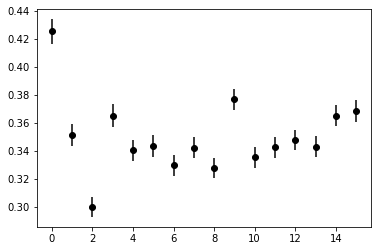

In [112]:
ros = np.unique(fc['rosette_number'])
zmin = 0.8
zmax = 1.05
rl = []
nl = []
el = []
for rs in ros:
    wdr = fc['rosette_number'] == rs
    wd = fc['Z'] > zmin
    wd &= fc['Z'] < zmax
    wd &= wdr
    wr = fcr['rosette_number'] == rs
    #print(rs,np.sum(fc[wd]['WEIGHT'])/len(fcr[wr])*2500)
    rl.append(rs)
    ng = np.sum(fc[wd]['WEIGHT'])/np.sum(fc[wdr]['WEIGHT'])#/len(fcr[wr])*2500
    nl.append(ng)
    el.append(ng*np.sqrt(len(fc[wd]['WEIGHT']))/len(fc[wd]['WEIGHT']))
plt.errorbar(rl,nl,el,fmt='ko')
plt.show()